<a href="https://colab.research.google.com/github/Harshkhapekar/Machine_learning_LAB/blob/main/Practical_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data = np.array([
    [2.5, 2.4, 1.2],
    [0.5, 0.7, 0.3],
    [2.2, 2.9, 0.3],
    [1.9, 2.2, 1.1],
    [3.1, 3.0, 1.7],
    [2.3, 2.7 ,1.5],
    [2.0, 1.6, 0.9],
    [1.0, 1.1, 0.4],
    [1.5, 1.6, 0.8],
    [1.1, 0.9, 0.2]
])
df = pd.DataFrame(data, columns=['x', 'y', 'z'])
df

,x,y,z
0,2.5,2.4,1.2
1,0.5,0.7,0.3
2,2.2,2.9,0.3
3,1.9,2.2,1.1
4,3.1,3.0,1.7
5,2.3,2.7,1.5
6,2.0,1.6,0.9
7,1.0,1.1,0.4
8,1.5,1.6,0.8
9,1.1,0.9,0.2


In [4]:
standardized_data = (df - df.mean()) / df.std()

In [6]:
cov_matrix = np.cov(standardized_data.T)

In [7]:
eig_vals , eig_vecs = np.linalg.eig(cov_matrix)

In [8]:
sorted_indices = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[sorted_indices]
eig_vecs = eig_vecs[:, sorted_indices]

In [10]:
eig_vecs_subset = eig_vecs[:, :2]

In [12]:
reduced_data = standardized_data.to_numpy().dot(eig_vecs_subset)
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])

In [13]:
print("\nReduced Data (after PCA):\n", reduced_df)


Reduced Data (after PCA):
         PC1       PC2
0  1.235127  0.047570
1 -2.389138  0.310317
2  0.422946 -1.565537
3  0.534622  0.179863
4  2.620166  0.257411
5  1.594892  0.354889
6 -0.004677  0.246117
7 -1.628526  0.072043
8 -0.491438  0.221710
9 -1.893975 -0.124383


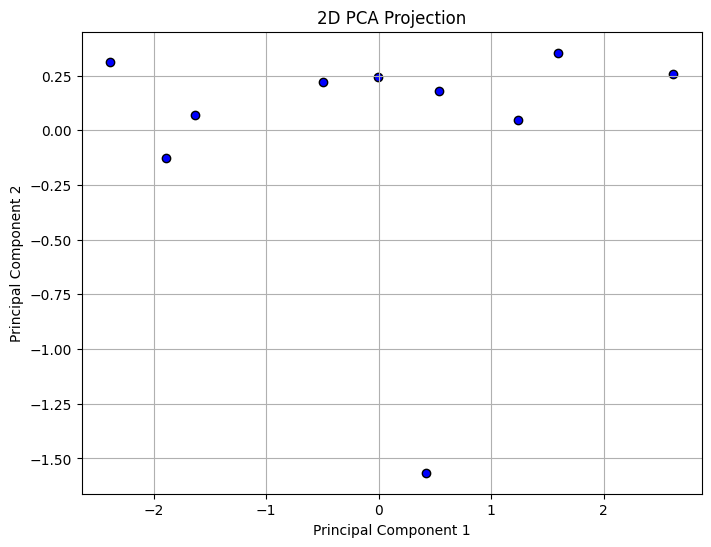

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], color='blue', edgecolor='k')
plt.title('2D PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()